In [2]:
import numpy as np
import tclab
import time
from datetime import datetime
import os

import matplotlib.pyplot as plt
from IPython.display import display, clear_output

import package_DBR
from package_DBR import myRound

In [3]:
Ts = 1

MV0 = 50
DV0 = 50

NumRTsteps = 5

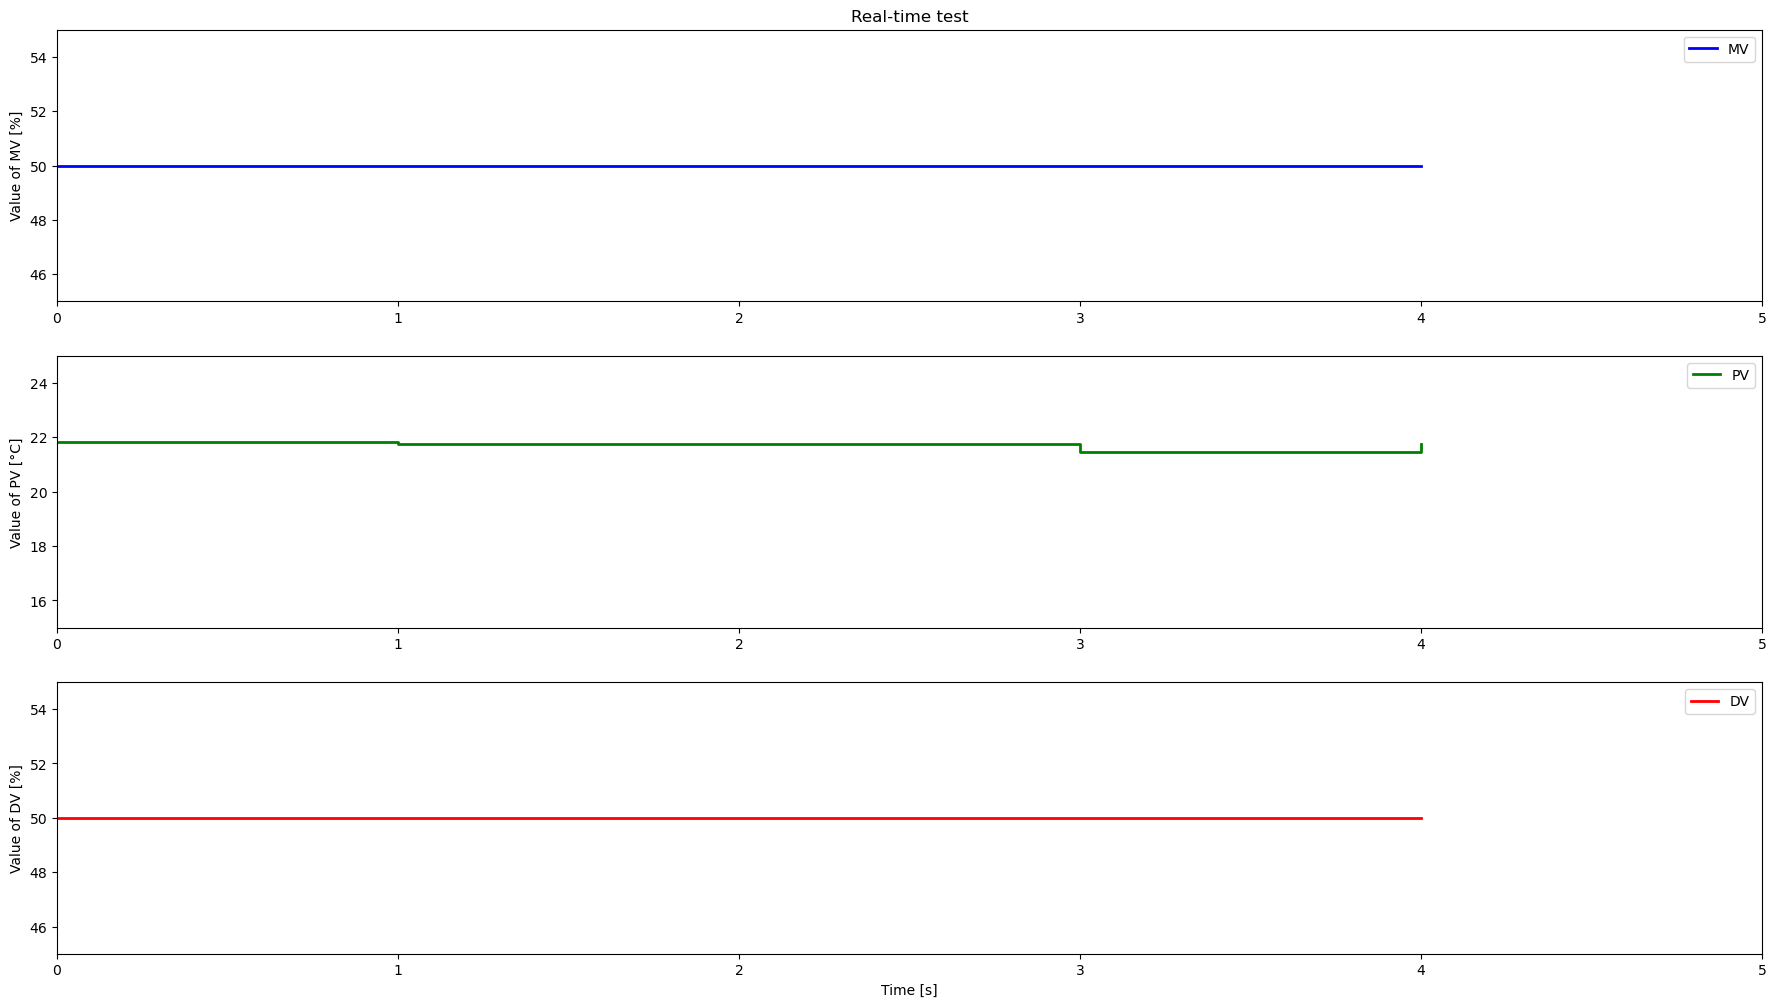

TCLab disconnected successfully.


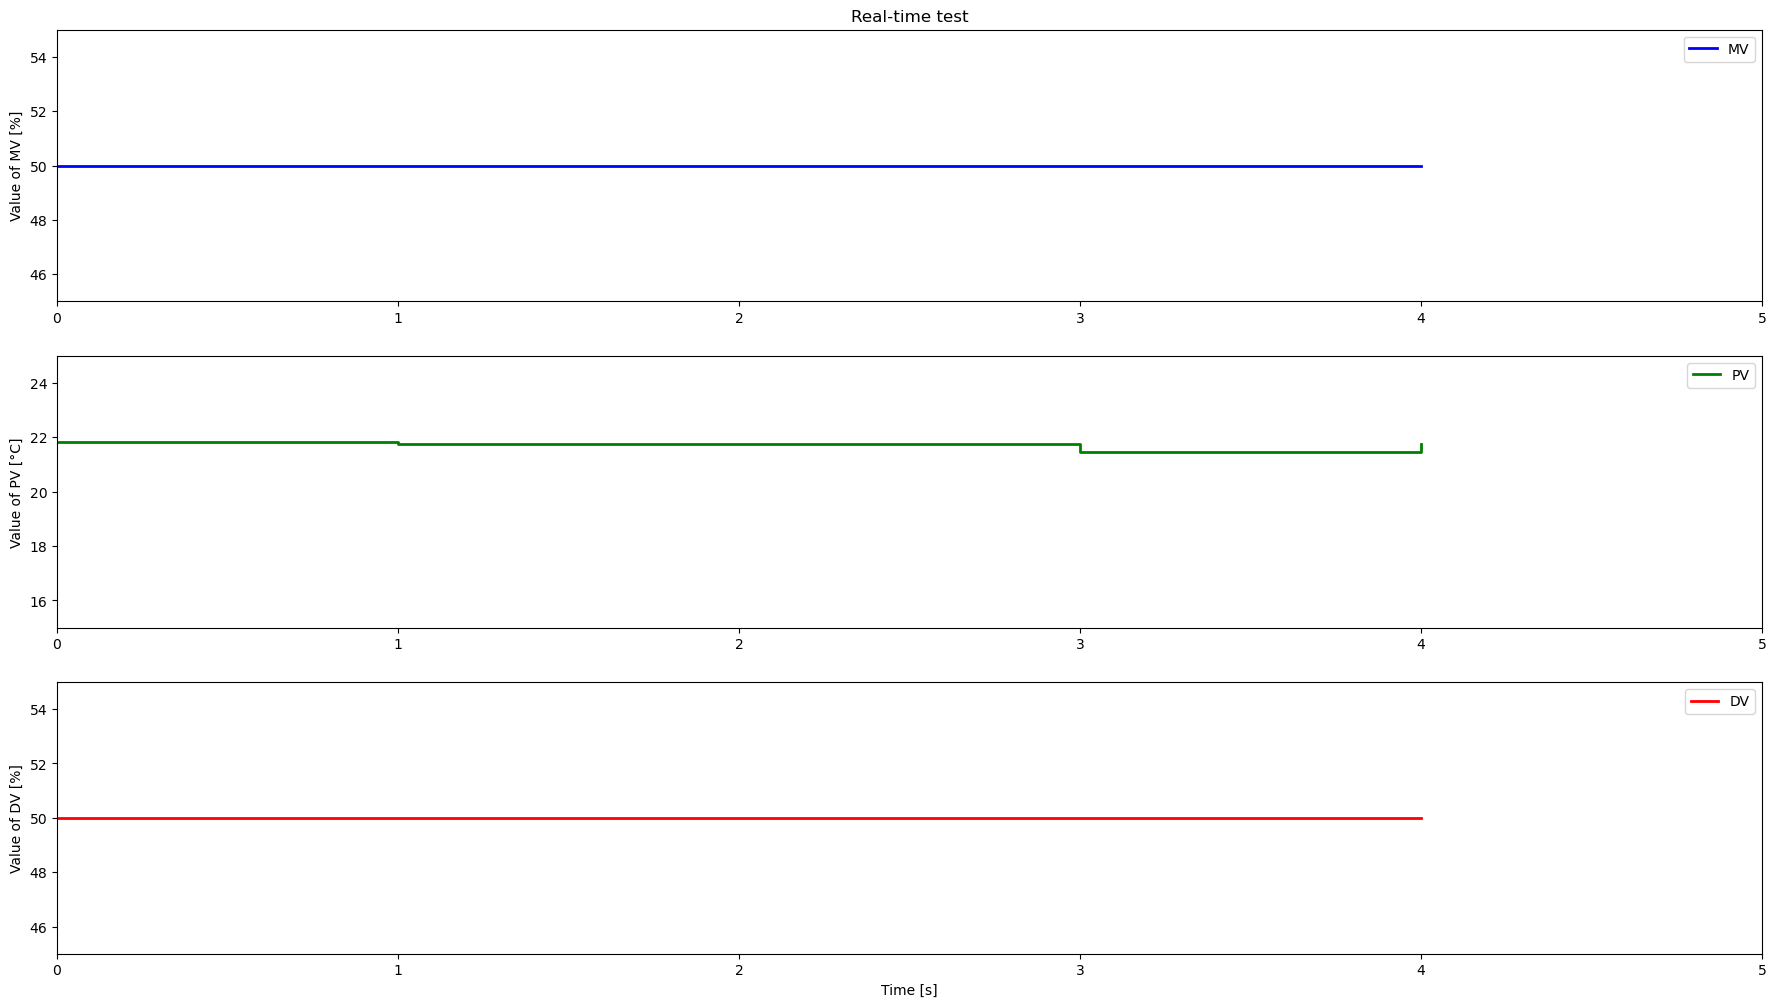

In [4]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1)
fig.set_figheight(12)
fig.set_figwidth(22)

l1, = ax1.step([0,1],[0,100],'b-',linewidth=2,label='MV',where='post')
ax1.set_ylabel('Value of MV [%]')
ax1.set_title('Real-time test')
ax1.legend(loc='best')

l2, = ax2.step([0,1],[0,100],'g-',linewidth=2,label='PV',where='post')
ax2.set_ylabel('Value of PV [°C]')
ax2.legend(loc='best')

l3, = ax3.step([0,1],[0,100],'r-',linewidth=2,label='DV',where='post')
ax3.set_xlabel('Time [s]')
ax3.set_ylabel('Value of DV [%]')
ax3.legend(loc='best') 

lab = tclab.TCLab()

Exp = True

t = []
MV = []
PV = []
DV = []
i = 0

# Experiment is started
while Exp:
    MVValue = MV0
    DVValue = DV0
    lab.Q1(MVValue)
    lab.Q2(DVValue)
    t.append(i*Ts)
    
    if t[-1] == 0:
        last_time = time.time()    
    
    MV.append(MVValue)
    DV.append(DVValue)    
    PV.append(lab.T1)
    
    # Wait for sampling period Ts
    now = time.time()
    delta = now - last_time
    
    time.sleep(np.max([0, Ts - delta]))
    last_time = time.time()    
    
    l1.set_data(t,MV)
    l2.set_data(t,PV)
    l3.set_data(t,DV)
    
    clear_output(wait=True)    
    
    # Remove if increasing x-axis length is not desired
    ax1.set_xlim(0, t[-1]+1)
    ax2.set_xlim(0, t[-1]+1)
    ax3.set_xlim(0, t[-1]+1)
    
    if i > 1:
        ax1.set_ylim(myRound(np.min(MV),5)-5, myRound(np.max(MV),5)+5)
        ax2.set_ylim(myRound(np.min(PV),5)-5, myRound(np.max(PV),5)+5)
        ax3.set_ylim(myRound(np.min(DV),5)-5, myRound(np.max(DV),5)+5)    
    
    display(fig)     
    
    i = i + 1
    
    if i == NumRTsteps:
        Exp = False
        lab.close()

# Save data in text file
# ----------------------
now = datetime.now()
date_time = now.strftime("%Y-%m-%d-%Hh%M")
# Conversion to array
t = np.array(t) 
MV = np.array(MV)
PV = np.array(PV)
DV = np.array(DV)        
my_data = np.vstack((t.T,MV.T,PV.T,DV.T))
my_data = my_data.T
nameFile = 'Data/RT_test_on_' + date_time + '.txt'
if not os.path.exists('Data'):
    os.makedirs('Data')
np.savetxt(nameFile,my_data,delimiter=',',header='t,MV,PV,DV',comments='')        


# Save Plot
# ---------
if not os.path.exists('Plots'):
    os.makedirs('Plots')

titleName = 'RT_test_on_' + date_time
plt.savefig('Plots\\' + titleName + '.png',transparent=True)
plt.savefig('Plots\\' + titleName + '.pdf',transparent=True)
    